# Import Packages

In [2]:
import pandas as pd
import numpy as np
import random
from plotnine import *

# repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# datetime 
from datetime import timedelta, date, datetime
from dateutil.relativedelta import relativedelta

# Load the raw data

We are only loading the excel sheets we will use for our research purposes. The sheets we need are `Demographics`, `Presenting Problems`, `Emergency Crisis Services`.

In [3]:
# Read selected excel sheets into pandas dataframes and save in a dictionary
file_path = '../input/Dartmouth Data Set.xlsx'
sheet_names = ['Demographics', 'Presenting Problems', 'Emergency Crisis Services', 'living Situation change', 'In-patient admissions']

# create an empty dictionary to store the sheet data
sheet_data = {}

# loop through each sheet name and read the corresponding sheet data into a pandas dataframe
for sheet_name in sheet_names:
    sheet_data[sheet_name] = pd.read_excel(file_path, sheet_name)

# Save the data in variables and inspect them

In [4]:
# Retrieve the dataframes from the dictionary and save them in variables
demographics = sheet_data['Demographics']
presenting_problems = sheet_data['Presenting Problems']
emergency_crisis_services = sheet_data['Emergency Crisis Services']
living_situation_change = sheet_data['living Situation change']
in_patient_admissions = sheet_data['In-patient admissions']

In [5]:
# Explore the demographics dataframe
demographics.head()
demographics.columns
demographics.info()

,Local ID,Region,County,Start Coordinator,Date Enrolled in START,Status,Status Date,Time Enrolled in START,Source of referral to START,Suitability of enrollment in START,...,State sponsored ICF/DD stay in past 1 - 5 years (at enrollment to START),Jailed in the past year (at enrollment to START),Jailed in the past 1 - 5 years (at enrollment to START),Employment Status at Enrollment,Grade In School,Current IEP,Current 504 Plan,School Setting,Custody Status,Child Lives With
0,8085297,California : CA START East Bay,Contra Costa,Mary Akhuetie,2020-12-30,Active,2020-12-30,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,Student,Grade 7,Yes: 2020-11-16,No,Special school-out of district,Parental custody,Parents
1,440987,New York : Region 3,Saratoga,Natalia Wolosen,2020-12-29,Inactive (stable functioning),2021-08-09,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,Student,Grade 11,No,No,Other: BOCES 4:1:2,Parental custody,Parents
2,8008815,California : CA START East Bay,Alameda,Sharon Cyrus-Savary,2020-12-29,Inactive (no longer requesting services),2021-06-27,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,Student,Grade 8,Yes: 2020-01-01,No,Special school-in district,Parental custody,Parents
3,220396,New York : Region 3,Albany,Matthew Wolcott,2020-12-29,Inactive (inappropriate for services),2021-06-11,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,Not employed,NaN,NaN,NaN,NaN,NaN,NaN
4,6570649,California : CA START San Andreas,Santa Cruz,Ilian Navarro,2020-12-29,Active,2020-12-29,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,...,No,No,No,NaN,NaN,NaN,NaN,Other: COE Program Held at Cabrillo College,NaN,NaN


Index(['Local ID', 'Region', 'County', 'Start Coordinator',
       'Date Enrolled in START', 'Status', 'Status Date',
       'Time Enrolled in START', 'Source of referral to START',
       'Suitability of enrollment in START',
       'Individual/Caregiver reliable access to technology',
       'Presenting problems at time of enrollment', 'Services at Enrollment',
       'Date of birth', 'Gender', 'Race', 'Ethnicity',
       'Level of Intellectual Disability',
       'Current living situation at enrollment to START',
       'More than one living situation over the last 5 years?',
       'More than one living situation over the last year?',
       'Psychiatric hospitalization in past year (at enrollment to START)',
       'Psychiatric hospitalizations in past 1 - 5 years (at enrollment to START)',
       'Emergency department visits in past year (at enrollment to START)',
       'Emergency department visits in past 1-5 years (at enrollment to START)',
       'Law enforcement encounters i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 48 columns):
 #   Column                                                                                  Non-Null Count  Dtype         
---  ------                                                                                  --------------  -----         
 0   Local ID                                                                                4986 non-null   object        
 1   Region                                                                                  4986 non-null   object        
 2   County                                                                                  4986 non-null   object        
 3   Start Coordinator                                                                       4947 non-null   object        
 4   Date Enrolled in START                                                                  4986 non-null   datetime64[ns]
 5   Status              

In [6]:
# Explore the emergency crisis services dataframe
emergency_crisis_services.head()
emergency_crisis_services.columns
emergency_crisis_services.info()

,Individual ID,Region,Date/Time of Contact,Source of Contact,Reason for Contact,Type of Emergency Response,Total episode length (initial call to disposition),Total response time (initial call to arrival on-site),Travel Time,Police Response,...,Restraints Used,If Restraints Were Used,Disposition,Disposition Information,Admitted through ED/CPEP,Date of Admission,Disposition Information (ER),Did START response prevent higher level of care (hospital diversion),RSQ Completed?,Entered By
0,11153125,New Hampshire : Region 2 - Pathways/Claremont,2016-08-16 08:40:00,Case Manager/Service Coordinator,"At risk of losing placement, Other, Self-injur...",Phone consultation only,15.0,NaN,NaN,No,...,No,NaN,Other: outpatient MH appt,NaN,No,NaT,NaN,No,No,Valarie Tetreault
1,11153125,New Hampshire : Region 2 - Pathways/Claremont,2018-04-27 15:00:00,Case Manager/Service Coordinator,"Mental health symptoms, Self-injurious",In-person: Emergency room,60.0,240.0,60.0,No,...,No,NaN,START emergency resource center admission,NaN,No,NaT,NaN,Yes,No,Samantha L Field
2,11153125,New Hampshire : Region 2 - Pathways/Claremont,2018-06-05 16:00:00,Residential provider - Community,"Mental health symptoms, Suicidal ideation/beha...",Other: phone and email,120.0,NaN,NaN,No,...,No,NaN,Psychiatric Hospital Admission,NaN,No,NaT,NaN,Yes,No,Samantha L Field
3,11158347,New Hampshire : Region 9 - Community Partners,2015-06-01 14:00:00,Family member,"Diagnosis and treatment plan assistance, Other...",Phone consultation only,254.0,NaN,NaN,No,...,No,NaN,START emergency resource center admission,NaN,No,NaT,NaN,No,No,Valarie Tetreault
4,11158347,New Hampshire : Region 9 - Community Partners,2015-06-01 16:00:00,Family member,"Aggression (physical, verbal, property destruc...",Phone consultation only,70.0,NaN,NaN,No,...,No,NaN,Maintain current setting,Planned Resource Center referral,No,NaT,NaN,No,No,Valarie Tetreault


Index(['Individual ID', 'Region', 'Date/Time of Contact', 'Source of Contact',
       'Reason for Contact', 'Type of Emergency Response',
       'Total episode length (initial call to disposition)',
       'Total response time (initial call to arrival on-site)', 'Travel Time',
       'Police Response', 'If Police Responded', 'Who Contacted Police?',
       'Mobile Crisis', 'If Mobile Crisis', 'Restraints Used',
       'If Restraints Were Used', 'Disposition', 'Disposition Information',
       'Admitted through ED/CPEP', 'Date of Admission',
       'Disposition Information (ER)',
       'Did START response prevent higher level of care (hospital diversion)',
       'RSQ Completed?', 'Entered By'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18168 entries, 0 to 18167
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   Individual ID                                                         18168 non-null  object        
 1   Region                                                                18168 non-null  object        
 2   Date/Time of Contact                                                  18168 non-null  datetime64[ns]
 3   Source of Contact                                                     17780 non-null  object        
 4   Reason for Contact                                                    17983 non-null  object        
 5   Type of Emergency Response                                            17930 non-null  object        
 6   Total episode length (initial call to 

In [7]:
# Explore the presenting problems dataframe
presenting_problems.head()
presenting_problems.columns
presenting_problems.info()

,Client Local Id,START Coordinator,Region,Presenting Problems at Enrollment
0,1,Ashley Gruver,Iowa : County Social Services,"Aggression (physical, verbal, property destruc..."
1,1,Ashley Gruver,Iowa : County Social Services,Mental health symptoms
2,1,Ashley Gruver,Iowa : County Social Services,Self-injurious
3,000083W,Amy Huff,North Carolina : West,"Aggression (physical, verbal, property destruc..."
4,000083W,Amy Huff,North Carolina : West,Decrease in ability to participate in daily fu...


Index(['Client Local Id', 'START Coordinator', 'Region',
       'Presenting Problems at Enrollment'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31014 entries, 0 to 31013
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Client Local Id                    31014 non-null  object
 1   START Coordinator                  29435 non-null  object
 2   Region                             31014 non-null  object
 3   Presenting Problems at Enrollment  31014 non-null  object
dtypes: object(4)
memory usage: 969.3+ KB


Let's skim `Presenting Problems at Enrollment` to see the presented problems

In [8]:
random.choices(presenting_problems['Presenting Problems at Enrollment'].unique(), k = 20)

['Other: Addition information for aggression (physical and property destruction)',
 'Other: Trauma from past abuse',
 'Other: Multiple calls to 911 and EPS visits',
 'Other: Transition/support planning',
 'Other: Theft, Substance Abuse',
 'Other: Noncompliance',
 'Other: team wants consultation with Dr. Tobe our medical director, they want to use start as a venue to get medications changed, team does not feel mother is acting in best interest.  she is legal guardian',
 'Other: Mental Symptoms-Anxiety  Self-injurious-Skin picking',
 "Other: multiple calls to '911'",
 'Other: medication & care refusal',
 'Other: cannot acheive stability',
 'Other: Arrested/DUI',
 'Other: educational concerns/concern over academic placement',
 'Other: homeless',
 'Other: J.G needs support to improve emotional regulation, manage mental health symptoms, and decrease crisis.',
 'Other: Training needed for providers and family members.',
 'Other: CPS involvement, educational neglect',
 'Other: Daily Crying',


<font color = "green"> As we can see above the presented problems are all over the place. In the next section, we will focus on cleaning this column using regex to narrow down the presented problems.  </font>

# Data cleaning/preprocessing

Let's first `Presenting Problems at Enrollment` column to `presented_problems` for more readability.

In [9]:
# rename the column
presenting_problems.rename(columns={'Presenting Problems at Enrollment': 'presented_problems'}, inplace=True)

# confirm that the column was renamed successfully
presenting_problems.columns

Index(['Client Local Id', 'START Coordinator', 'Region', 'presented_problems'], dtype='object')

In [10]:
presenting_problems['presented_problems'].value_counts()

Aggression (physical, verbal, property destruction, threats)                                                                                        7427
Family needs assistance                                                                                                                             4489
Mental health symptoms                                                                                                                              4356
Self-injurious                                                                                                                                      2640
Diagnosis and treatment plan assistance                                                                                                             2246
                                                                                                                                                    ... 
Other: Social Skills                                                              

Now, let's turn all the presenting problems in lowercase to see add consistency.

In [11]:
presenting_problems['presented_problems'] = presenting_problems['presented_problems'].str.lower()
presenting_problems.sample(2)

,Client Local Id,START Coordinator,Region,presented_problems
23915,5017,LeAnn Rosado,Iowa : County Social Services,family needs assistance
11550,278826C,Laurel Powell,North Carolina : Central,family needs assistance


In [12]:
# subset to rows that do not contain 'other:' for presented problems
presenting_problems_no_other = presenting_problems[~presenting_problems["presented_problems"].str.contains('other:')].copy()
presenting_problems_no_other.presented_problems.unique()

presenting_problems_no_other.shape[0]

print(f"The number of unique presenting problems before dropping 'Other' is: {presenting_problems.presented_problems.nunique()}")
print(f"The number of unique presenting problems is: {presenting_problems_no_other.presented_problems.nunique()}")

array(['aggression (physical, verbal, property destruction, threats)',
       'mental health symptoms', 'self-injurious ',
       'decrease in ability to participate in daily functions',
       'leaving unexpectedly', 'diagnosis and treatment plan assistance',
       'family needs assistance', 'at risk of losing placement',
       'sexualized behavior', 'suicidal ideation',
       'transition from hospital', 'suicidal action'], dtype=object)

30011

The number of unique presenting problems before dropping 'Other' is: 704
The number of unique presenting problems is: 12


Let's see how many rows we are losing by removing presented problems that start with `Other:`

In [13]:
print(f"Retention Rate After Dropping 'Other': {round(100*presenting_problems_no_other.shape[0]/presenting_problems.shape[0], 2)}%")

Retention Rate After Dropping 'Other': 96.77%


A retention rate of 96.77% is really good, so we will stick with the 12 unique presented problems. Now, we will write a function to parse the `Region` variable to `state` and `region`

In [14]:
def parse_region(row):
    """
    Parse a string in the format "<state>: <region>" and return a tuple
    containing the state and region.
    
    Parameters:
    row (str): A string in the format "<state> : <region>".
    
    Returns:
    A tuple containing the parsed state and region.
    """
    state, region = row.lower().split(':')
    return state.strip(), region.strip()

# apply the function on the demographics, presenting_problems_no_other, and emergency_crisis_services dataframes
presenting_problems_no_other.loc[:, ['state', 'region_new']] = presenting_problems_no_other['Region'].apply(parse_region).tolist()
demographics.loc[:, ['state', 'region_new']] = demographics['Region'].apply(parse_region).tolist()
emergency_crisis_services.loc[:, ['state', 'region_new']] = emergency_crisis_services['Region'].apply(parse_region).tolist()

# sample from the presenting_problems_no_other dataframe
presenting_problems_no_other.sample(3)

,Client Local Id,START Coordinator,Region,presented_problems,state,region_new
15924,353903,Sulay Lora,New York : Region 4 Tri-Borough - The Bronx,decrease in ability to participate in daily fu...,new york,region 4 tri-borough - the bronx
19930,410732,Oscarlina Nunez,New York : Region 4 Tri-Borough - The Bronx,decrease in ability to participate in daily fu...,new york,region 4 tri-borough - the bronx
3565,11140677,David Cote,New Hampshire : Region 4 - Community Bridges,"aggression (physical, verbal, property destruc...",new hampshire,region 4 - community bridges


In [15]:
# check all the unique states in the presenting_problems_no_other dataframe
presenting_problems_no_other.state.unique()

array(['iowa', 'north carolina', 'texas', 'new york', 'california',
       'colorado', 'new hampshire', 'maryland'], dtype=object)

Next, we will merge the `demographic` and `presenting_problems_no_other` dataframes using the `Client ID`.

In [92]:
demographics_problems_merged = presenting_problems_no_other.merge(demographics, left_on='Client Local Id', right_on='Local ID',
                                                                  how='inner', suffixes=('_presenting_problems', '_demographics'), 
                                                                  indicator = True).drop_duplicates()

In [93]:
demographics_problems_merged.sample(3)
demographics_problems_merged.shape

,Client Local Id,START Coordinator,Region_presenting_problems,presented_problems,state_presenting_problems,region_new_presenting_problems,Local ID,Region_demographics,County,Start Coordinator,...,Employment Status at Enrollment,Grade In School,Current IEP,Current 504 Plan,School Setting,Custody Status,Child Lives With,state_demographics,region_new_demographics,_merge
15805,697072C,Teri Knighton,North Carolina : Central,transition from hospital,north carolina,central,697072C,North Carolina : Central,Wake,Teri Knighton,...,Not employed,Grade 6,Yes: 2017-04-02,No,Separate classroom,Relative custody,Relatives,north carolina,central,both
8527,348176,Chelsea Borowski,New York : Region 1,self-injurious,new york,region 1,348176,New York : Region 1,Erie,Chelsea Borowski,...,Not employed,Not in school,No,No,NaN,NaN,Parents,new york,region 1,both
2254,11179350,Erica Arzilli,New Hampshire : Region 6 - Gateways Community ...,family needs assistance,new hampshire,region 6 - gateways community services,11179350,New Hampshire : Region 6 - Gateways Community ...,Hillsborough,Erica Arzilli,...,Day/vocational program,Grade 11,Yes: 2018-05-07,NaN,Special school-out of district,Parental custody,Parents,new hampshire,region 6 - gateways community services,both


(17808, 57)

Using the `Date Enrolled in START` variable in the merged data frame, we will make a binary classifier of whether or not the client enrolled pre or post COVID. We will use March 01, 2020 as the cutoff date.

In [94]:
# convert to datetime format and save in enrollment_date
demographics_problems_merged['enrollment_date'] = pd.to_datetime(demographics_problems_merged['Date Enrolled in START'])
print(f"Data type for the date variable: {demographics_problems_merged['enrollment_date'].dtype}")

# create a binary clarity column based on pre and post covid.
date_cutoff = pd.to_datetime("2020-03-01")
demographics_problems_merged['is_post_covid'] = demographics_problems_merged['enrollment_date'] >= date_cutoff

# check the value counts to see how many of the inputs are post covid
demographics_problems_merged['is_post_covid'].value_counts()

Data type for the date variable: datetime64[ns]


False    14270
True      3538
Name: is_post_covid, dtype: int64

In [95]:
demographics_problems_merged.columns

Index(['Client Local Id', 'START Coordinator', 'Region_presenting_problems',
       'presented_problems', 'state_presenting_problems',
       'region_new_presenting_problems', 'Local ID', 'Region_demographics',
       'County', 'Start Coordinator', 'Date Enrolled in START', 'Status',
       'Status Date', 'Time Enrolled in START', 'Source of referral to START',
       'Suitability of enrollment in START',
       'Individual/Caregiver reliable access to technology',
       'Presenting problems at time of enrollment', 'Services at Enrollment',
       'Date of birth', 'Gender', 'Race', 'Ethnicity',
       'Level of Intellectual Disability',
       'Current living situation at enrollment to START',
       'More than one living situation over the last 5 years?',
       'More than one living situation over the last year?',
       'Psychiatric hospitalization in past year (at enrollment to START)',
       'Psychiatric hospitalizations in past 1 - 5 years (at enrollment to START)',
       'Eme

In [96]:
# round down to the first of the month and year
demographics_problems_merged['enrollment_ym_derived'] = demographics_problems_merged.enrollment_date.dt.to_period('M').dt.to_timestamp(how='start')

# create a new column for the year
demographics_problems_merged['enrollment_year'] = pd.DatetimeIndex(demographics_problems_merged['enrollment_date']).year

demographics_problems_merged[['enrollment_date', 'enrollment_ym_derived', 'enrollment_year']].sample(3)


,enrollment_date,enrollment_ym_derived,enrollment_year
12147,2017-10-24,2017-10-01,2017
15503,2019-10-16,2019-10-01,2019
13693,2020-03-24,2020-03-01,2020


In [101]:
# remove the rows where 'Gender' starts with 'other'
demographics_problems_merged = demographics_problems_merged[~demographics_problems_merged["Gender"].str.contains('Other:')]
demographics_problems_merged.Gender.value_counts()

Male      12096
Female     5640
Name: Gender, dtype: int64

In [175]:
# renaming the disability level column
demographics_problems_merged.rename(columns={'Level of Intellectual Disability': 'disability_level'}, inplace=True)

In [176]:
# creating new subset for people that presented aggression problems
demographics_aggression_problems = demographics_problems_merged[demographics_problems_merged["presented_problems"] == "aggression (physical, verbal, property destruction, threats)"].copy()

#verifying we subsetted correctly
demographics_aggression_problems["presented_problems"].value_counts()
demographics_aggression_problems.columns

aggression (physical, verbal, property destruction, threats)    4251
Name: presented_problems, dtype: int64

Index(['Client Local Id', 'START Coordinator', 'Region_presenting_problems',
       'presented_problems', 'state_presenting_problems',
       'region_new_presenting_problems', 'Local ID', 'Region_demographics',
       'County', 'Start Coordinator', 'Date Enrolled in START', 'Status',
       'Status Date', 'Time Enrolled in START', 'Source of referral to START',
       'Suitability of enrollment in START',
       'Individual/Caregiver reliable access to technology',
       'Presenting problems at time of enrollment', 'Services at Enrollment',
       'Date of birth', 'Gender', 'Race', 'Ethnicity', 'disability_level',
       'Current living situation at enrollment to START',
       'More than one living situation over the last 5 years?',
       'More than one living situation over the last year?',
       'Psychiatric hospitalization in past year (at enrollment to START)',
       'Psychiatric hospitalizations in past 1 - 5 years (at enrollment to START)',
       'Emergency department visit

In [177]:
# verifying we renamed correctly
demographics_aggression_problems.columns

Index(['Client Local Id', 'START Coordinator', 'Region_presenting_problems',
       'presented_problems', 'state_presenting_problems',
       'region_new_presenting_problems', 'Local ID', 'Region_demographics',
       'County', 'Start Coordinator', 'Date Enrolled in START', 'Status',
       'Status Date', 'Time Enrolled in START', 'Source of referral to START',
       'Suitability of enrollment in START',
       'Individual/Caregiver reliable access to technology',
       'Presenting problems at time of enrollment', 'Services at Enrollment',
       'Date of birth', 'Gender', 'Race', 'Ethnicity', 'disability_level',
       'Current living situation at enrollment to START',
       'More than one living situation over the last 5 years?',
       'More than one living situation over the last year?',
       'Psychiatric hospitalization in past year (at enrollment to START)',
       'Psychiatric hospitalizations in past 1 - 5 years (at enrollment to START)',
       'Emergency department visit

In [178]:
demographics_aggression_problems['disability_level'].value_counts()
demographics_aggression_problems['Gender'].value_counts()
demographics_aggression_problems['Ethnicity'].value_counts()

demographics_aggression_problems.groupby("Gender")['disability_level'].value_counts()

demographics_aggression_problems.groupby("disability_level")['state_demographics'].value_counts()


Mild                   1777
Moderate               1286
Severe                  328
None noted              322
Normal intelligence     271
Borderline              210
Profound                 56
Name: disability_level, dtype: int64

Male      2985
Female    1266
Name: Gender, dtype: int64

Not of Hispanic origin                      3239
Hispanic - specific origin not specified     674
Unknown, not collected                       338
Name: Ethnicity, dtype: int64

Gender  disability_level   
Female  Mild                    622
        Moderate                387
        Severe                   88
        None noted               61
        Borderline               49
        Normal intelligence      47
        Profound                 12
Male    Mild                   1155
        Moderate                899
        None noted              261
        Severe                  240
        Normal intelligence     224
        Borderline              161
        Profound                 44
Name: disability_level, dtype: int64

disability_level     state_demographics
Borderline           new york              111
                     north carolina         27
                     california             25
                     new hampshire          22
                     texas                  15
                     iowa                   10
Mild                 new york              885
                     north carolina        360
                     new hampshire         193
                     texas                 156
                     california             94
                     iowa                   79
                     colorado               10
Moderate             new york              727
                     north carolina        264
                     texas                 110
                     new hampshire          75
                     california             62
                     iowa                   43
                     colorado                5
None noted          

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

<AxesSubplot:xlabel='Enrollment Year', ylabel='Count'>

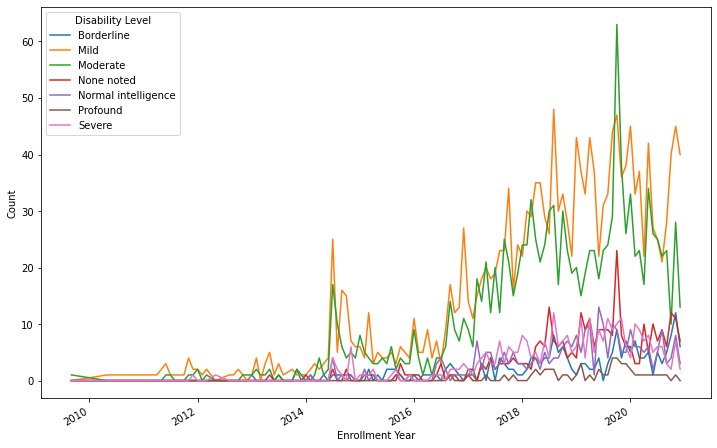

In [179]:
# line plot of the total number of people for each aggression level over time (by month-year)
plot_by_ym = demographics_aggression_problems.groupby('enrollment_ym_derived')['disability_level'].value_counts().unstack().fillna(0).plot(figsize=(12, 8))
plot_by_ym.set_xlabel("Enrollment Year")
plot_by_ym.set_ylabel("Count")
plot_by_ym.legend(title="Disability Level")
plot_by_ym

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

<AxesSubplot:xlabel='Enrollment Year', ylabel='Count'>

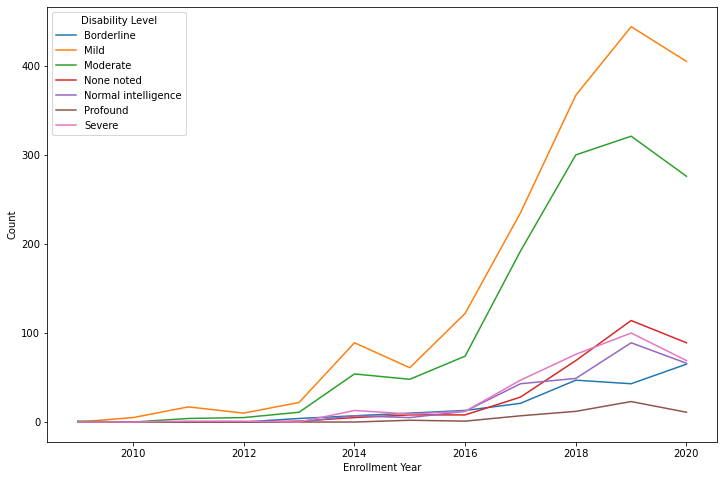

In [180]:
# line plot of the total number of people for each aggression level by year
plot_by_y = demographics_aggression_problems.groupby('enrollment_year')['disability_level'].value_counts().unstack().fillna(0).plot(figsize=(12, 8))
plot_by_y.set_xlabel("Enrollment Year")
plot_by_y.set_ylabel("Count")
plot_by_y.legend(title="Disability Level")
plot_by_y

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

<AxesSubplot:xlabel='Enrollment Year', ylabel='Count'>

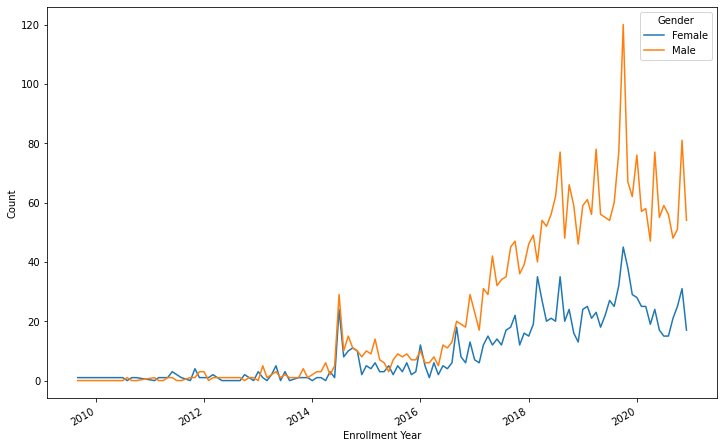

In [181]:
# line plot of the total number of people for each aggression level by year
gender_by_ym = demographics_aggression_problems.groupby('enrollment_ym_derived')['Gender'].value_counts().unstack().fillna(0).plot(figsize=(12, 8))
gender_by_ym.set_xlabel("Enrollment Year")
gender_by_ym.set_ylabel("Count")
gender_by_ym.legend(title="Gender")
gender_by_ym

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

<AxesSubplot:xlabel='Enrollment Year', ylabel='Count'>

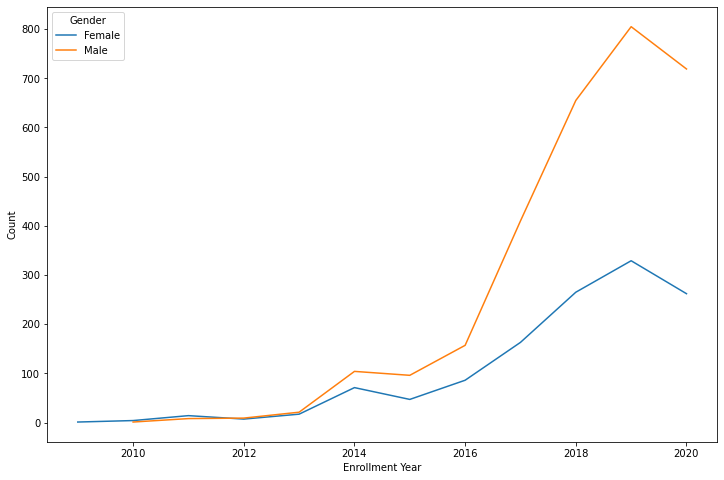

In [182]:
gender_by_ym = demographics_aggression_problems.groupby('enrollment_year')['Gender'].value_counts().unstack().plot(figsize=(12, 8))
gender_by_ym.set_xlabel("Enrollment Year")
gender_by_ym.set_ylabel("Count")
gender_by_ym.legend(title="Gender")
gender_by_ym

<AxesSubplot:xlabel='enrollment_year'>

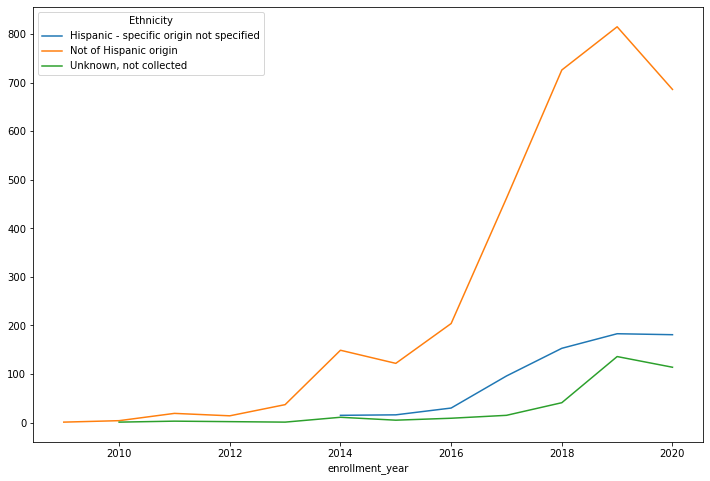

In [183]:
demographics_aggression_problems.groupby('enrollment_year')['Ethnicity'].value_counts().unstack().plot(figsize=(12, 8))

<AxesSubplot:xlabel='Gender'>

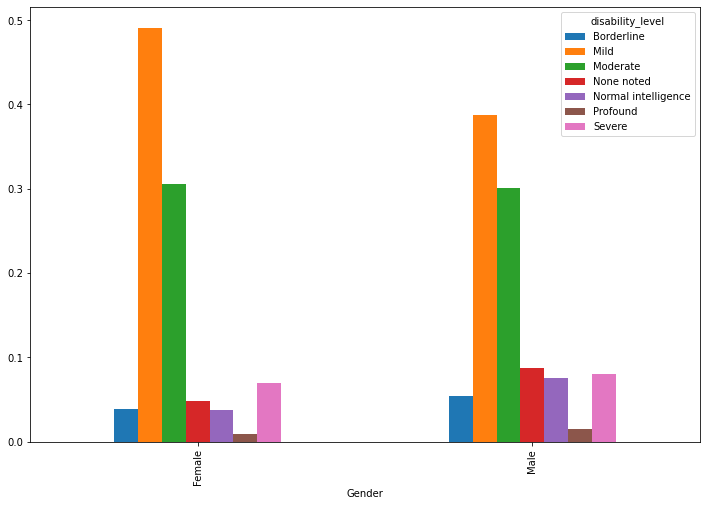

In [184]:
demographics_aggression_problems.groupby("Gender")['disability_level'].value_counts(normalize = True).unstack().plot(kind='bar', figsize=(12, 8))

<AxesSubplot:xlabel='enrollment_year,Gender'>

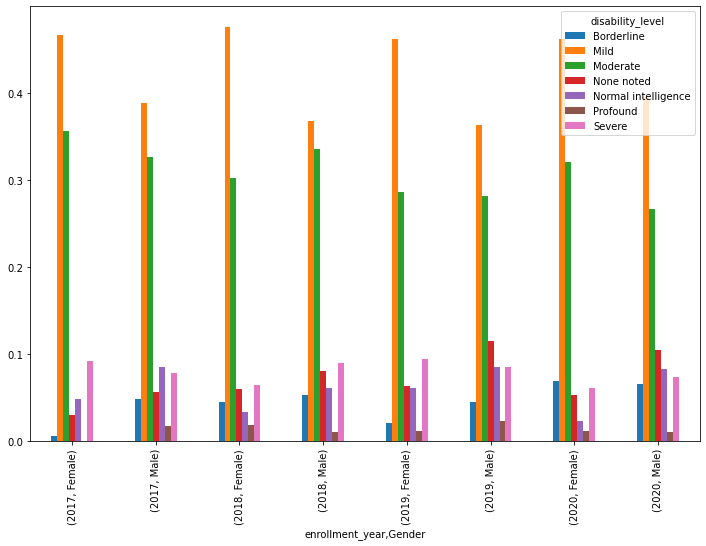

In [185]:
temp = demographics_aggression_problems[demographics_aggression_problems.enrollment_year > 2016]
temp.groupby(['enrollment_year', 'Gender'])['disability_level'].value_counts(normalize=True).unstack().fillna(0).plot(kind='bar', figsize=(12, 8))

In [186]:
demographics_aggression_problems.disability_level.unique()

array(['Mild', 'Severe', 'Moderate', 'Profound', 'Normal intelligence',
       'None noted', 'Borderline', nan], dtype=object)

<AxesSubplot:xlabel='state_demographics'>

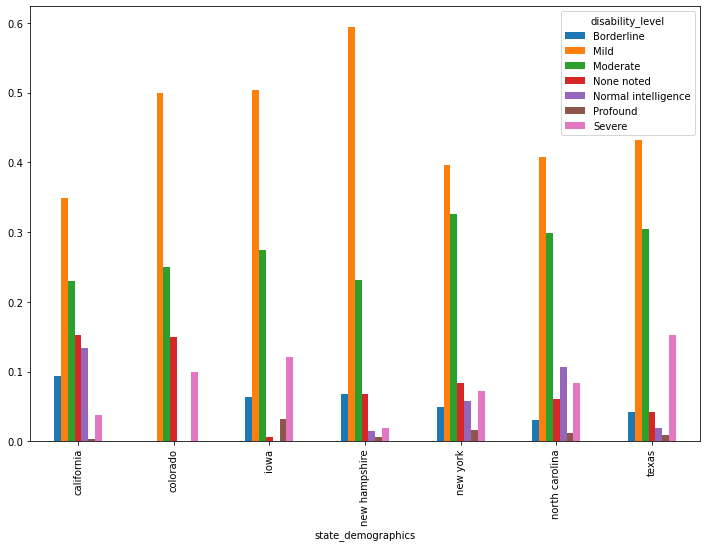

In [187]:
demographics_aggression_problems.groupby(['state_demographics'])["disability_level"].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12, 8))


<AxesSubplot:xlabel='state_demographics'>

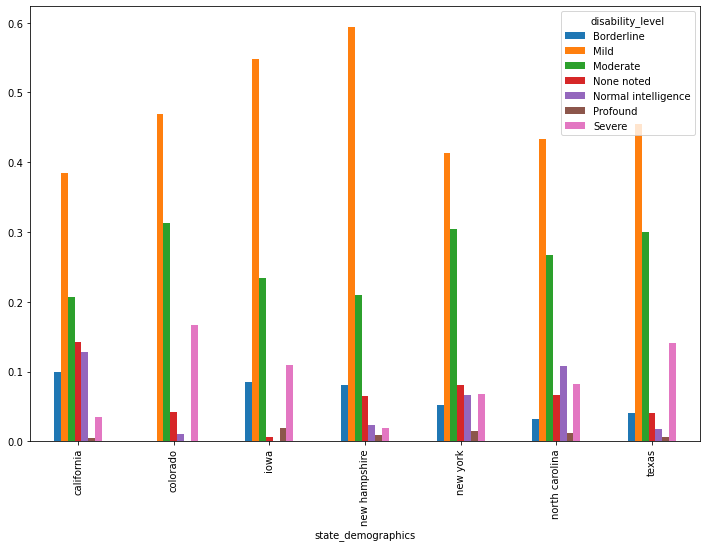

In [188]:
## the demographics merged dataset before subsetting to aggression problems
demographics_problems_merged.groupby(['state_demographics'])["disability_level"].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12, 8))
